In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

In [ ]:
dftrain = pd.read_csv('../DataSets/MNIST_train.csv')
dfval = pd.read_csv('../DataSets/MNIST_validation.csv')
dftrain.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,even
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
dftrain.drop(columns = ['even'], inplace = True)
dfval.drop(columns = ['even'], inplace = True)
featurecols = list(dftrain.columns)
featurecols.remove('label')
targetcol = 'label'
Xtrain = dftrain[featurecols]
ytrain = dftrain[targetcol]
Xval = dfval[featurecols]
yval = dfval[targetcol]

In [4]:
Xtrain.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Xval.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
ytrain

0        0
1        3
2        4
3        3
4        4
        ..
9997     1
9998     2
9999     5
10000    3
10001    1
Name: label, Length: 10002, dtype: int64

In [7]:
Xtrain = Xtrain.values.astype(np.float32)
Xval   = Xval.values.astype(np.float32)

In [8]:
# normalize
Xtrain /= 255.0
Xval   /= 255.0

In [9]:
from Algorithms import *
from Ensemble import WeightedEnsemble

Running PCA...
Training KNN...
Predicting...

============ KNN ============
Prediction Time : 0.61 sec
Accuracy        : 0.9628


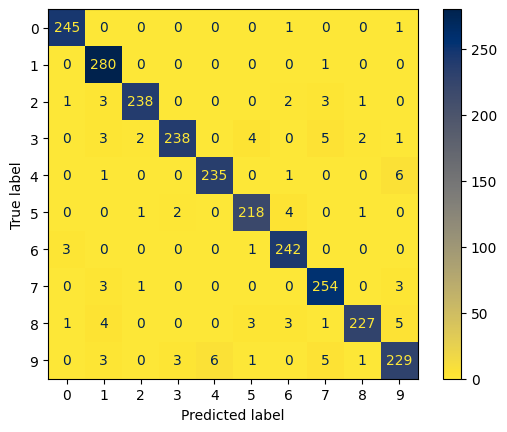

In [10]:
# ====== PCA ======
start_time = time.time()
print("Running PCA...")

PCA = PCAModel(n_components=49)
PCA.fit(Xtrain)
Xtrain_PCA = PCA.predict(Xtrain)
Xval_PCA = PCA.predict(Xval)

# ---------- Weighted KNN ----------
knn = WeightedKNN(k = 6)
print("Training KNN...")
knn.fit(Xtrain_PCA, ytrain.values)

print("Predicting...")
ypred_PCA_weighted_KNN = knn.predict(Xval_PCA)


end_time = time.time()
pred_time_PCA_weighted_KNN = end_time - start_time
# ---------- Accuracy ----------
accuracy_PCA_weighted_KNN = accuracy_score(yval, ypred_PCA_weighted_KNN)
print("\n============ KNN ============")
print(f"Prediction Time : {pred_time_PCA_weighted_KNN:.2f} sec")
print(f"Accuracy        : {accuracy_PCA_weighted_KNN:.4f}")

cm = confusion_matrix(yval, ypred_PCA_weighted_KNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='cividis_r')
plt.show()

--- Fitting Ensemble Models ---
Fitting KNN (weight: 1) on raw data...
Fitting KNN PCA (weight: 1) on PCA data...
Fitting Weighted KNN (weight: 1) on raw data...
Fitting Weighted KNN PCA (weight: 4) on PCA data...
Fitting XGBoost (weight: 1) on raw data...
Training One-vs-All classifiers for 10 classes...
Training classifier for class 0 (1/10)
Training classifier for class 1 (2/10)
Training classifier for class 2 (3/10)
Training classifier for class 3 (4/10)
Training classifier for class 4 (5/10)
Training classifier for class 5 (6/10)
Training classifier for class 6 (7/10)
Training classifier for class 7 (8/10)
Training classifier for class 8 (9/10)
Training classifier for class 9 (10/10)
One-vs-All training completed!
Fitting RandomForrest (weight: 1) on raw data...
Fitting tree 1/100
Fitting tree 2/100
Fitting tree 3/100
Fitting tree 4/100
Fitting tree 5/100
Fitting tree 6/100
Fitting tree 7/100
Fitting tree 8/100
Fitting tree 9/100
Fitting tree 10/100
Fitting tree 11/100
Fitting tre

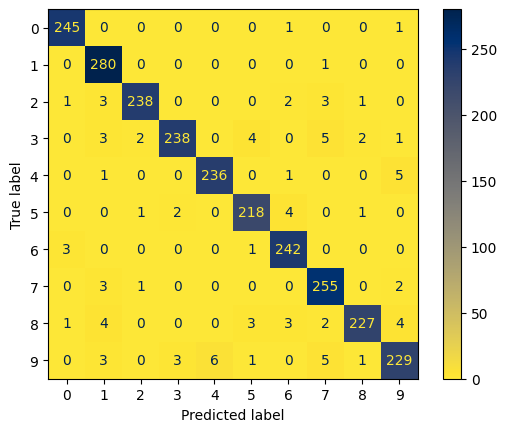

In [11]:
KNN_1 = KNN(k = 5)
KNN_2 = KNN(k = 5)
weighted_KNN_1 = WeightedKNN(k = 6)
weighted_KNN_2 = WeightedKNN(k = 6)
XGB = OneVsAllXGBoost()
RF = RandomForrest()

model_dict = {
    'KNN' : (KNN_1, 1),
    'KNN PCA' : (KNN_2, 1),
    'Weighted KNN' : (weighted_KNN_1, 1),
    'Weighted KNN PCA' : (weighted_KNN_2, 4),
    'XGBoost' : (XGB, 1),
    'RandomForrest' : (RF, 1)
}

pca_flags = [0, 1, 0, 1, 0, 0]

ensemble = WeightedEnsemble(
        model_weights_dict=model_dict,
        pca_flags=pca_flags,
        pca_class=PCAModel,      # Pass the *class* itself
        pca_components=49     # Use 10 components for PCA
    )

start_time = time.time()
ensemble.fit(Xtrain, ytrain)

ypred = ensemble.predict(Xval)
end_time = time.time()
run_time = end_time - start_time

accuracy_ensemble = accuracy_score(yval, ypred)

print("\n============ KNN ============")
print(f"Prediction Time : {run_time:.2f} sec")
print(f"Accuracy        : {accuracy_ensemble:.4f}")

cm = confusion_matrix(yval, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='cividis_r')
plt.show()